<a href="https://colab.research.google.com/github/HendrixOB/Proyectos-II/blob/main/semana8/ReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Aprendizaje por Refuerzo (Reinforcement learning)</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesora: María Fernanda Sánchez Puig</i></h5>
    <h5 align="center"><i>Ayudante: Sergio Miguel Fernández Martínez</i></h5>
    <h5 align="center"><i>Alumno: Hendrix R. Olvera Barbecho</i></h5>
  <h5 align="center"><i>Materia: Proyecto II</i></h5>
  </font>
  

<center>
<img src="https://github.com/HendrixOB/ProyectoII/blob/main/Imagenes/areas.png?raw=1" width="600"> 
</center>

El aprendizaje por refuerzo es un hibrido entre el aprendizaje supervizado y el no supervizado. ¿Pero que es?

En el aprendizaje supervisado, se te da un conjunto de datos etiquetado y el objetivo es utilizar ese conjunto de datos para determinar una regla general que te permita etiquetar cualquier nuevo punto de datos que puedas encontrar.

En el aprendizaje no supervisado, se le entrega un conjunto de datos sin etiquetar y el objetivo es para sacar conclusiones sobre la estructura subyacente de los datos, simplemente examinando las relaciones que existen entre los puntos de datos.

El aprendizaje por refuerzo, en lugar de presentar un conjunto de datos por adelantado, normalmente se te presenta un entorno desconocido (como un laberinto, la bolsa de valores de EE. UU. o incluso el mundo real) y debe recopilar datos hablando de acciones en ese entorno (por ejemplo, elegir cuál de las dos puertas atravesar en un videojuego) y observar las consecuencias.


<center>
<img src="https://github.com/HendrixOB/ProyectoII/blob/main/Imagenes/puertas.jpg?raw=1" width="600"> 
</center>

En resumen podemos ver al aprendizaje por refuerzo como subcampo del aprendizaje automático que le enseña a un agente cómo elegir una acción de su espacio de acción, dentro de un entorno particular, para maximizar las recompensas con el tiempo.

Como cuando se le enseña a un perro a seguir instrucciones, si las hace bien se le recompesa.

<center>
<img src="https://github.com/HendrixOB/ProyectoII/blob/main/Imagenes/dog.webp?raw=1" width="600"> 
</center>

Tendremos tres cosas importantes aqui:

* Agente. El programa que entrena, con el objetivo de hacer el trabajo que especifique.
* Ambiente. El mundo, real o virtual, en el que el agente realiza acciones.
* Recompensas La evaluación de una acción, que puede ser positiva o negativa.

También tenemos:     

* Acción (State): Un movimiento realizado por el agente, que provoca un cambio de estado en el entorno.
Cuando el agente interacciona con el ambiente, obtenemos un cambio en nuestro entorno, el cual podemos ver como una secuencia de observaciones, acciones y recompensas. 

En cada paso de tiempo, denotado como $t$, el agente recivira una observación $O_{t}$, una acción $A_{t}$ y la recompena $R_{t}$ que regresa del ambiente, esto a lo largo de la siguiente observación $O_{t}$, esto se repetira hasta alcanzar un estado terminal.

Y podemos expresarlo como historia:     

$$H_{t} = \{O_{1},A_{1},R_{1} \}, \{O_{2},A_{2},R_{2} \},..., \{O_{t},A_{t},R_{t} \}$$

¿Qué pasa en es siguiente paso? Eso depende del paso anterior ¿Esto les recuerda algo?

<center>
<img src="https://github.com/HendrixOB/ProyectoII/blob/main/Imagenes/AprendizajeRefuerzo-global.png?raw=1" width="600"> 
</center>

Tenemos el **Modelo** que es una representación del agente en el ambiente.

Un agente su modelo del ambiente para predecir que es lo que pasara, entonces usaremos:     

* $\mathbb{P}$: El paso de transición del modelo / Probabilidad

* $\mathbb{R}$: La recompensa del modelo.


$\mathbb{P}$ nos ayudara a predecir la probabilidad de acabar en una estado $S'$ en el siguiente tiempo $t+1$ dado la estado $S$ y acción $A$ en el timepo $t$

$$\mathbb{P}_{SS'}^{A} = \mathbb{P} [S_{t+1}= S' | S_{t}=S, A_{t}=A]$$

Utilizamos las recompesas del modelo $\mathbb{R}$ para predecir la posible recompensa que se obtendra al hacer una acción $A$ en el estado $S$ del tiempo $t$:     

$$\mathbb{R}_{S}^{A} = \mathbb{E}[R_{t+1}| S_{t}=S, A_{t}=A]$$

**Value function**: esta función representa la recompensa que el agente predijo.hay de dos tipos 

**State-Value fuction**

State-Value fuction es el valor, es decir, el rendimiento esperado para seleccionar un estado determinado $S$ . Retorno significa la recompensa total.

$$V_{\pi} (S)= \mathbb{E}[R_{t+1}+ \gamma R_{t+2}+ \gamma^{2} R_{t+3}+...|S_{t}=S] $$

El valor de estado $S$ siguiendo la politica $\pi$ es la suma extendida de las recopemsas a futuro eliminadas, donde $\gamma$ es el factor de descuento y es número real en $[0,1]$  

**Action-value-function**

Siguiendo una política $\pi$, la Action-value-function devuelve lo bien estimado por el agente por usar la acción $A$ en un cierto estado $S$.

$$Q(S,A) = \mathbb{E}[R+ \gamma V(S_{t})]$$

$$Q(S,A) = \mathbb{E}[R_{t+1}+ \gamma R_{t+2}+ \gamma^{2} R_{t+3}+...|S_{t}=S, A_{t} =A]$$

Arriba mencionamos algo politica, y de seguro usted estimado lector se preguntara ¿A que se refiere? 

La politica, denotada por $\pi$, prescribe que acción hay que tomar dado el estado. Lo podemos ver como una función que manda estados a acciones.

Tenemos dos tipos de politica:    

* **Deterministic policy:** prescribe una acción para un estado dado, es decir, solo hay una acción $A$ dado un estado $S$

$$\pi (S)=A$$

* **Stochastic policy:** prescribe una distribución de acciones dado un estado $S$ en el tiempo $t$, es decir, que hay multiples acciones con un valor de probabilidad para cada estado.

$$\pi (A|S) = \mathbb[P][A_{t} = A|S_{t} = S]$$

# **Markov Decision Process**



Como sugiere el nombre, los MDP son las cadenas de Markov con juicio de valores. Básicamente, obtenemos un valor de cada estado en el que se encuentra nuestro agente.


**Proceso de recompensa de Markov** : como sugiere el nombre, los MDP son las cadenas de Markov con juicio de valores. Básicamente, obtenemos un valor de cada estado en el que se encuentra nuestro agente.

# **Planning with dynamic programming**

La programación dinamica es un metodo muy eficiente para resolver problemas que se pueden descomponer en sub-problemas superpuestos. En terminos simples trata de de almacenar los resultados de los sub problemas por si pueden ser usados más adelante, en vez de calcular los resultados otra vez.

Este metodo es muy usado para resolver un MDP, que significa que el agente puede encontrar el camino más optimo para actyar en un ambiente para archivar las recompensas más grandes.

# **Ejemplo:  Gridworld**

Gridworlds son entornos tabulares que se utilizan para probar algoritmos de aprendizaje por refuerzo. Un agente normalmente tiene cuatro movimientos disponibles y necesita determinar la mejor estrategia para maximizar su recompensa. Puede haber paredes, obstaculos, pozos, espacios especiales, lo que quieras en el entorno.

<center>
<img src="https://github.com/HendrixOB/ProyectoII/blob/main/Imagenes/gridworld.png?raw=1" width="600"> 
</center>

In [ ]:
N_Filas = 6 
N_Columnas = 9 
Ganar = (0, 8)
Perder = (2, 7)
INICIO = (0, 2)

In [ ]:
class State:
    def __init__(self, state=INICIO):
        self.board = np.zeros([N_Filas, N_Columnas])
        self.board[1, 1] = -1
        self.state = state
        self.acabo = False
        self.determine = True

    def Recompensar(self):
        if self.state == Ganar:
            return 1
        elif self.state == Perder:
            return -1
        else:
            return 0

    def terminar(self):
        if (self.state == Ganar) or (self.state == Perder):
            self.acabo = True

    def Posicion(self, action):
        if self.determine:
            if action == "arriba":
                nxtState = (self.state[0] , self.state[1]-1)
            elif action == "abajo":
                nxtState = (self.state[0], self.state[1]+1)
            elif action == "izquierda":
                nxtState = (self.state[0]-1, self.state[1])
            else:
                nxtState = (self.state[0]+1, self.state[1] )
            # if next state legal
            if (nxtState[0] >= 0) and (nxtState[0] <= (N_Filas -1)):
                if (nxtState[1] >= 0) and (nxtState[1] <= (N_Columnas -1)):
                    if nxtState != (1, 1):
                        return nxtState
            return self.state

    def tabla(self):
        self.board[self.state] = 1
        for i in range(0, N_Filas):
            print('-----------------')
            out = '| '
            for j in range(0, N_Columnas):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-----------------')

In [ ]:
class Agente:

    def __init__(self):
        self.states = []
        self.actions = ["arriba", "abajo", "izquierda", "derecha"]
        self.State = State()
        self.lr = 0.2
        self.exp_rate = 0.3
        self.state_values = {}
        for i in range(N_Filas):
            for j in range(N_Columnas):
                self.state_values[(i, j)] = 0

    def Accion(self):
        recompensa_siguiente = 0
        action = ""

        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            for a in self.actions:
                premio = self.state_values[self.State.Posicion(a)]
                if premio >= recompensa_siguiente:
                    action = a
                    recompensa_siguiente = premio
        return action

    def Siguiente_accion(self, action):
        position = self.State.Posicion(action)
        return State(state=position)

    def reset(self):
        self.states = []
        self.State = State()



    def Valores(self):
        for i in range(0, N_Filas):
            print('----------------------------------')
            out = '| '
            for j in range(0, N_Columnas):
                out += str(self.state_values[(i, j)]).ljust(6) + ' | '
            print(out)
        print('----------------------------------')

    def jugar(self, turnos=10):
        i = 0
        while i < turnos:
            if self.State.acabo:
                reward = self.State.Recompensar() #Asignamos las recompensas
                self.state_values[self.State.state] = reward
                print("Game Over Recompensa:", reward)
                for s in reversed(self.states):
                    reward = self.state_values[s] + self.lr * (reward - self.state_values[s])
                    self.state_values[s] = round(reward, 3)
                self.reset()
                i += 1
            else:
                action = self.Accion()
                self.states.append(self.State.Posicion(action))
                print("posición actual {} de la acción {}".format(self.State.state, action)) #Marcamos la posición en cada punto
                self.State = self.Siguiente_accion(action)
                self.State.terminar()
                print("Siguente Estado", self.State.state) #Termina el tiempo t
                print("---------------------")

In [ ]:
if __name__ == "__main__":
    ag = Agente()
    ag.jugar(6)
    print(ag.Valores())

Se truncaron las últimas líneas 5000 del resultado de transmisión.
posición actual (4, 8) de la acción derecha
Siguente Estado (5, 8)
---------------------
posición actual (5, 8) de la acción arriba
Siguente Estado (5, 7)
---------------------
posición actual (5, 7) de la acción derecha
Siguente Estado (5, 7)
---------------------
posición actual (5, 7) de la acción derecha
Siguente Estado (5, 7)
---------------------
posición actual (5, 7) de la acción derecha
Siguente Estado (5, 7)
---------------------
posición actual (5, 7) de la acción derecha
Siguente Estado (5, 7)
---------------------
posición actual (5, 7) de la acción derecha
Siguente Estado (5, 7)
---------------------
posición actual (5, 7) de la acción abajo
Siguente Estado (5, 8)
---------------------
posición actual (5, 8) de la acción derecha
Siguente Estado (5, 8)
---------------------
posición actual (5, 8) de la acción derecha
Siguente Estado (5, 8)
---------------------
posición actual (5, 8) de la acción derecha
Si

# **Monte Carlo and temporal difference learning**

Hasta el momento hemos visto la importancia de conocer el valor del estado de la función $V_{\pi}(S)$, la cual informa al agente del valor de estar en el estado $S$ , entonces el agente puede decidir si es un buen estado o no.

Monte Carlo y Temporal Difference son metodos que le permite al agente decidir. El objetivo de MC y TD es aprender los valores de la función de la experiencia del agente el cual sigue la politica $\pi$

Monte Carlo actualiza los valores cmabiando los actuales y regresando $G_{t}$, el cual es las recompensas totales descontadas del tempo $t$. Es decir que realizara $G_{t} = R_{t+1}+ \gamma R_{t+2}+...$ hasta el final, es importante notar que se puede calcular este valor solo después de la secuencia. 

TD actualiza los valores a travez de las estimaciones dadas por $R_{t+1} + \gamma V(S_{t+1})$, la cual se puede calcular después de cada paso.

# **Ejemplo: Monte Carlo**

<center>
<img src="https://github.com/HendrixOB/ProyectoII/blob/main/Imagenes/ejemplo.png?raw=1" width="600"> 
</center>

Este ejemplo es gracias a https://towardsdatascience.com/reinforcement-learning-rl-101-with-python-e1aa0d37d43b

El enfoque de Monte Carlo para resolver la tarea de gridworld es algo ingenuo pero efectivo. Básicamente, podemos producir n simulaciones a partir de puntos aleatorios de la cuadrícula y dejar que el robot se mueva aleatoriamente en las cuatro direcciones hasta que se logre un estado de terminación. Para cada simulación guardamos los 4 valores: (1) el estado inicial, (2) la acción realizada, (3) la recompensa recibida y (4) el estado final. Al final, una simulación es solo una matriz que contiene x matrices de estos valores, siendo x el número de pasos que el robot tuvo que dar hasta alcanzar un estado terminal.
Ahora, a partir de estas simulaciones, iteramos desde el final de la matriz de "experiencia" y calculamos $G$ como el valor del estado anterior en la misma experiencia (ponderado por gamma, el factor de descuento) más la recompensa recibida en ese estado. Luego almacenamos $G$ en una matriz de Devoluciones ($S_t$) . Finalmente, para cada estado calculamos el promedio de los retornos ($S_t$) y lo configuramos como el valor del estado en una iteración particular.

In [ ]:
# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000

In [ ]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [ ]:
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

In [ ]:
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    #print(episode)
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue

100%|██████████| 10000/10000 [00:14<00:00, 708.31it/s]


In [ ]:
V

array([[ 0.        , -1.62965054, -2.21748544, -2.3792431 ],
       [-1.63702094, -2.10708154, -2.28244018, -2.21153861],
       [-2.21967908, -2.2825244 , -2.11492961, -1.63178735],
       [-2.3783606 , -2.20457303, -1.63680789,  0.        ]])

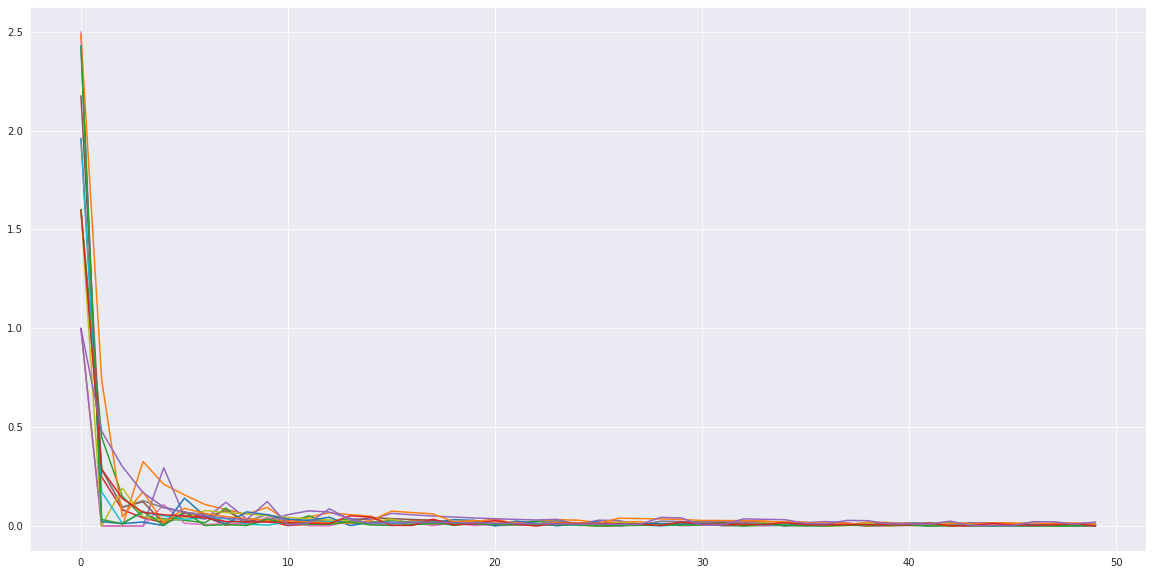

In [ ]:
# using gamma = 0.6
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

# **SARSA Y Q-LEARNING**

Para un Agente es muy importante conocer la función de valor de acción $Q_{\pi}(S,A)$, la cual informa al agente los largos terminos de valores de tomar la acción $A$ en el estado $S$, el agente puede tomar esas acciones que pueden maximizar las recomensas descontinuadas futuras. Y es donde aparece SARSA y Q-LEARNING 

\begin{array}{|c|c|}
\hline
\text{Learning methods} & \text{Action-value fuction}\\ 
\hline
SARSA & Q(S,A)=Q(S,A)+ \alpha( R + \gamma Q(S',A') - Q(S,A))\\ 
Q-learning &  Q(S,A)=Q(S,A)+ \alpha( R + \gamma max_{A} Q(S',A') - Q(S,A))\\ 
\hline
\end{array}

SARSA State$\rightarrow$Action$\rightarrow$Reward$\rightarrow$State'$\rightarrow$Action'. El algoritmo funciona el estado $S$ toma una acción $A$ y obtiene una recompensa $R$y acaba en el siguiente estado $S'$, cuando el agente toma una acción $A'$ en el siguiente estado. 

Q-learning trabaja similar que SARSA, pero con una diferencia en vez de calcular el valor $Q$ del nuevo estado, este busca obtener el máximo estado posible del nuevo estado $S'$.

Los algoritmos de RL vienen en dos variedades: “basado en modelo” y “sin modelo”.

Con RL “basado en modelo” , determinamos el curso de acción óptimo (también conocido como la política óptima ) utilizando un modelo predeterminado de nuestro entorno (que puede o no ser exacto), mientras que con RL “sin modelo”, nuestro objetivo es determinar la política óptima mediante la interacción con el entorno.

Los algoritmos de RL sin modelo pueden, a su vez, dividirse en dos tipos: “dentro de la política” y “fuera de la política”, en relación con la forma en que interactuamos con el entorno para recopilar información al respecto.

Con los algoritmos de “política”, tomamos decisiones sobre nuestras acciones basadas en nuestra “mejor” política en el momento de tomar la decisión y luego usamos la información recopilada de esa acción para mejorar la mejor política.

Con algoritmos “fuera de política”, por otro lado, nuestro comportamiento en i interactuar con (o explorar) el entorno puede no estar relacionado con lo que creemos que es el mejor óptimo en el momento de tomar la acción.

Por ejemplo, podemos elegir deliberadamente tomar una acción que sabemos que es subóptima en el corto plazo para determinar si resulta en una mayor recompensa a largo plazo.

Q-Learning es un algoritmo RL “sin modelo, sin política”.

Q-learning funciona mediante la construcción de un tabla de valores $Q$, $Q (S, A)$, que representa la recompensa esperada (a largo plazo) descontada de tomar acción $A$ en el estado del entorno $S$ y luego mejorar iterativamente en esta tabla mediante interactuando con el entorno hasta que se encuentre la tabla $Q$ óptima.

Inicialmente, todos los valores en la tabla $Q$ se establecen iguales a pequeños números aleatorios (con la excepción de los valores $Q (S, A)$ para los estados terminales, que son iguales a 0).


Cada vez que se realiza una acción en el entorno, un (estado, acción, recompensa, nuevo estado) Se produce la tupla. Esto representa el estado del medio ambiente inmediatamente anterior a la acción, $S$ la acción tomada en ese estado, a la recompensa inmediata recibida después de esa acción $R$ y el nuevo estado del entorno después de la acción, $S'$.

Estas tuplas (estado, acción, recompensa, nuevo estado) se utilizan para actualizar iterativamente los valores en la tabla $Q$, donde el valor $Q (S, A)$ actualizado, denotado como $Q ‘(S, A)$, se establece igual al promedio ponderado del valor $Q (S, A)$ antiguo y al valor $Q$ implícito en la nueva observación. Es decir, la suma de la recompensa inmediata y  la recompensa con descuento esperada recibida a partir del nuevo estado, asumiendo que siempre elige la acción óptima.

# **Deep Reinforcement Learning**

Sabemos que el agente trabaja onbservando el ambiente y tomando desiciones para ver que cambios produce.

Si el resultado de esa decisión es beneficioso, el agente aprende automáticamente a repetir esa decisión en el futuro, mientras que si el resultado fuera perjudicial evitará volver a tomar la misma decisión.

De este modo, siguiendo un proceso de aprendizaje por condicionamiento similar al de los seres vivos, el agente aprende qué decisiones son más adecuadas según la situación, y desarrolla estrategias a largo plazo que maximicen los beneficios.

El “cerebro” o la capacidad de aprendizaje del agente viene dada por un modelo de Deep Learning o red neuronal profunda. Esto permite explotar todos los avances recientes en redes neuronales artificiales, pudiendo así tratar con problemas que requieran analizar datos no estructurados como imágenes, sonidos o lenguaje natural.

<center>
<img src="https://github.com/HendrixOB/ProyectoII/blob/main/Imagenes/aprendizaje-refuerzo.jpg?raw=1" width="800"> 
</center>


Un cambio muy importante en el aprendizaje profundo por refuerzo es que la politica que manejamos cambia ya no es como las politicas deterministas $\pi(S)=A$ o como en estocastico $\pi(A|S)=\mathbb{P}[A_{t} =A |S_{t} = S]$, aqui nuestras acciones pueden ser discretas, el cambio es que manejaremos vectores multi-dimensionales de probabilidad, podemos actualizar las politicas al actualizar los parametros de la red neuronal. A esto lo llamamos optimización de politica basado en aprendizaje profundo de refuerzo 

In [ ]:
import numpy as np
from __future__ import print_function
import os, sys, time, datetime, json, random
import progressbar

import gym

from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD , Adam, RMSprop
from keras.layers.advanced_activations import PReLU
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
visited_mark = 0.8  # Cells visited by the rat will be painted by gray 0.8
rat_mark = 0.5      # The current rat cell will be painteg by gray 0.5
LEFT = 0
UP = 1
RIGHT = 2
DOWN = 3

# Actions dictionary
actions_dict = {
    LEFT: 'left',
    UP: 'up',
    RIGHT: 'right',
    DOWN: 'down',
}

num_actions = len(actions_dict)

# Exploration factor
epsilon = 0.1

In [ ]:
class Qmaze(object):
    def __init__(self, maze, rat=(0,0)):
        self._maze = np.array(maze)
        nrows, ncols = self._maze.shape
        self.target = (nrows-1, ncols-1)   # target cell where the "cheese" is
        self.free_cells = [(r,c) for r in range(nrows) for c in range(ncols) if self._maze[r,c] == 1.0]
        self.free_cells.remove(self.target)
        if self._maze[self.target] == 0.0:
            raise Exception("Invalid maze: target cell cannot be blocked!")
        if not rat in self.free_cells:
            raise Exception("Invalid Rat Location: must sit on a free cell")
        self.reset(rat)

    def reset(self, rat):
        self.rat = rat
        self.maze = np.copy(self._maze)
        nrows, ncols = self.maze.shape
        row, col = rat
        self.maze[row, col] = rat_mark
        self.state = (row, col, 'start')
        self.min_reward = -0.5 * self.maze.size
        self.total_reward = 0
        self.visited = set()

    def update_state(self, action):
        nrows, ncols = self.maze.shape
        nrow, ncol, nmode = rat_row, rat_col, mode = self.state

        if self.maze[rat_row, rat_col] > 0.0:
            self.visited.add((rat_row, rat_col))  # mark visited cell

        valid_actions = self.valid_actions()
                
        if not valid_actions:
            nmode = 'blocked'
        elif action in valid_actions:
            nmode = 'valid'
            if action == LEFT:
                ncol -= 1
            elif action == UP:
                nrow -= 1
            if action == RIGHT:
                ncol += 1
            elif action == DOWN:
                nrow += 1
        else:                  # invalid action, no change in rat position
            mode = 'invalid'

        # new state
        self.state = (nrow, ncol, nmode)

    def get_reward(self):
        rat_row, rat_col, mode = self.state
        nrows, ncols = self.maze.shape
        if rat_row == nrows-1 and rat_col == ncols-1:
            return 1.0
        if mode == 'blocked':
            return self.min_reward - 1
        if (rat_row, rat_col) in self.visited:
            return -0.25
        if mode == 'invalid':
            return -0.75
        if mode == 'valid':
            return -0.04

    def act(self, action):
        self.update_state(action)
        reward = self.get_reward()
        self.total_reward += reward
        status = self.game_status()
        envstate = self.observe()
        return envstate, reward, status

    def observe(self):
        canvas = self.draw_env()
        envstate = canvas.reshape((1, -1))
        return envstate

    def draw_env(self):
        canvas = np.copy(self.maze)
        nrows, ncols = self.maze.shape
        # clear all visual marks
        for r in range(nrows):
            for c in range(ncols):
                if canvas[r,c] > 0.0:
                    canvas[r,c] = 1.0
        # draw the rat
        row, col, valid = self.state
        canvas[row, col] = rat_mark
        return canvas

    def game_status(self):
        if self.total_reward < self.min_reward:
            return 'lose'
        rat_row, rat_col, mode = self.state
        nrows, ncols = self.maze.shape
        if rat_row == nrows-1 and rat_col == ncols-1:
            return 'win'

        return 'not_over'

    def valid_actions(self, cell=None):
        if cell is None:
            row, col, mode = self.state
        else:
            row, col = cell
        actions = [0, 1, 2, 3]
        nrows, ncols = self.maze.shape
        if row == 0:
            actions.remove(1)
        elif row == nrows-1:
            actions.remove(3)

        if col == 0:
            actions.remove(0)
        elif col == ncols-1:
            actions.remove(2)

        if row>0 and self.maze[row-1,col] == 0.0:
            actions.remove(1)
        if row<nrows-1 and self.maze[row+1,col] == 0.0:
            actions.remove(3)

        if col>0 and self.maze[row,col-1] == 0.0:
            actions.remove(0)
        if col<ncols-1 and self.maze[row,col+1] == 0.0:
            actions.remove(2)

        return actions

In [ ]:
def show(qmaze):
    plt.grid('on')
    nrows, ncols = qmaze.maze.shape
    ax = plt.gca()
    ax.set_xticks(np.arange(0.5, nrows, 1))
    ax.set_yticks(np.arange(0.5, ncols, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    canvas = np.copy(qmaze.maze)
    for row,col in qmaze.visited:
        canvas[row,col] = 0.6
    rat_row, rat_col, _ = qmaze.state
    canvas[rat_row, rat_col] = 0.3   # rat cell
    canvas[nrows-1, ncols-1] = 0.9 # cheese cell
    img = plt.imshow(canvas, interpolation='none', cmap='gray')
    return img

In [ ]:
def play_game(model, qmaze, rat_cell):
    qmaze.reset(rat_cell)
    envstate = qmaze.observe()
    while True:
        prev_envstate = envstate
        # get next action
        q = model.predict(prev_envstate)
        action = np.argmax(q[0])

        # apply action, get rewards and new state
        envstate, reward, game_status = qmaze.act(action)
        if game_status == 'win':
            return True
        elif game_status == 'lose':
            return False

In [ ]:
def completion_check(model, qmaze):
    for cell in qmaze.free_cells:
        if not qmaze.valid_actions(cell):
            return False
        if not play_game(model, qmaze, cell):
            return False
    return True

In [ ]:
class Experience(object):
    def __init__(self, model, max_memory=100, discount=0.95):
        self.model = model
        self.max_memory = max_memory
        self.discount = discount
        self.memory = list()
        self.num_actions = model.output_shape[-1]

    def remember(self, episode):
        # episode = [envstate, action, reward, envstate_next, game_over]
        # memory[i] = episode
        # envstate == flattened 1d maze cells info, including rat cell (see method: observe)
        self.memory.append(episode)
        if len(self.memory) > self.max_memory:
            del self.memory[0]

    def predict(self, envstate):
        return self.model.predict(envstate)[0]

    def get_data(self, data_size=10):
        env_size = self.memory[0][0].shape[1]   # envstate 1d size (1st element of episode)
        mem_size = len(self.memory)
        data_size = min(mem_size, data_size)
        inputs = np.zeros((data_size, env_size))
        targets = np.zeros((data_size, self.num_actions))
        for i, j in enumerate(np.random.choice(range(mem_size), data_size, replace=False)):
            envstate, action, reward, envstate_next, game_over = self.memory[j]
            inputs[i] = envstate
            # There should be no target values for actions not taken.
            targets[i] = self.predict(envstate)
            # Q_sa = derived policy = max quality env/action = max_a' Q(s', a')
            Q_sa = np.max(self.predict(envstate_next))
            if game_over:
                targets[i, action] = reward
            else:
                # reward + gamma * max_a' Q(s', a')
                targets[i, action] = reward + self.discount * Q_sa
        return inputs, targets


In [ ]:
def qtrain(model, maze, **opt):
    global epsilon
    n_epoch = opt.get('n_epoch', 15000)
    max_memory = opt.get('max_memory', 1000)
    data_size = opt.get('data_size', 50)
    weights_file = opt.get('weights_file', "")
    name = opt.get('name', 'model')
    start_time = datetime.datetime.now()

    # If you want to continue training from a previous model,
    # just supply the h5 file name to weights_file option
    if weights_file:
        print("loading weights from file: %s" % (weights_file,))
        model.load_weights(weights_file)

    # Construct environment/game from numpy array: maze (see above)
    qmaze = Qmaze(maze)

    # Initialize experience replay object
    experience = Experience(model, max_memory=max_memory)

    win_history = []   # history of win/lose game
    n_free_cells = len(qmaze.free_cells)
    hsize = qmaze.maze.size//2   # history window size
    win_rate = 0.0
    imctr = 1

    for epoch in range(n_epoch):
        loss = 0.0
        rat_cell = random.choice(qmaze.free_cells)
        qmaze.reset(rat_cell)
        game_over = False

        # get initial envstate (1d flattened canvas)
        envstate = qmaze.observe()

        n_episodes = 0
        while not game_over:
            valid_actions = qmaze.valid_actions()
            if not valid_actions: break
            prev_envstate = envstate
            # Get next action
            if np.random.rand() < epsilon:
                action = random.choice(valid_actions)
            else:
                action = np.argmax(experience.predict(prev_envstate))

            # Apply action, get reward and new envstate
            envstate, reward, game_status = qmaze.act(action)
            if game_status == 'win':
                win_history.append(1)
                game_over = True
            elif game_status == 'lose':
                win_history.append(0)
                game_over = True
            else:
                game_over = False

            # Store episode (experience)
            episode = [prev_envstate, action, reward, envstate, game_over]
            experience.remember(episode)
            n_episodes += 1

            # Train neural network model
            inputs, targets = experience.get_data(data_size=data_size)
            h = model.fit(
                inputs,
                targets,
                epochs=8,
                batch_size=16,
                verbose=0,
            )
            loss = model.evaluate(inputs, targets, verbose=0)

        if len(win_history) > hsize:
            win_rate = sum(win_history[-hsize:]) / hsize
    
        dt = datetime.datetime.now() - start_time
        t = format_time(dt.total_seconds())
        template = "Epoch: {:03d}/{:d} | Loss: {:.4f} | Episodes: {:d} | Win count: {:d} | Win rate: {:.3f} | time: {}"
        print(template.format(epoch, n_epoch-1, loss, n_episodes, sum(win_history), win_rate, t))
        # we simply check if training has exhausted all free cells and if in all
        # cases the agent won
        if win_rate > 0.9 : epsilon = 0.05
        if sum(win_history[-hsize:]) == hsize and completion_check(model, qmaze):
            print("Reached 100%% win rate at epoch: %d" % (epoch,))
            break

    # Save trained model weights and architecture, this will be used by the visualization code
    h5file = name + ".h5"
    json_file = name + ".json"
    model.save_weights(h5file, overwrite=True)
    with open(json_file, "w") as outfile:
        json.dump(model.to_json(), outfile)
    end_time = datetime.datetime.now()
    dt = datetime.datetime.now() - start_time
    seconds = dt.total_seconds()
    t = format_time(seconds)
    print('files: %s, %s' % (h5file, json_file))
    print("n_epoch: %d, max_mem: %d, data: %d, time: %s" % (epoch, max_memory, data_size, t))
    return seconds

# This is a small utility for printing readable time strings:
def format_time(seconds):
    if seconds < 400:
        s = float(seconds)
        return "%.1f seconds" % (s,)
    elif seconds < 4000:
        m = seconds / 60.0
        return "%.2f minutes" % (m,)
    else:
        h = seconds / 3600.0
        return "%.2f hours" % (h,)

In [ ]:
def build_model(maze, lr=0.001):
    model = Sequential()
    model.add(Dense(maze.size, input_shape=(maze.size,)))
    model.add(PReLU())
    model.add(Dense(maze.size))
    model.add(PReLU())
    model.add(Dense(num_actions))
    model.compile(optimizer='adam', loss='mse')
    return model

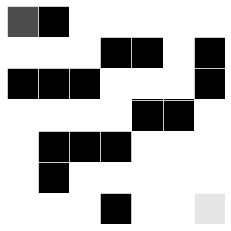

In [ ]:
maze =  np.array([
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  0.,  0.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  0.,  0.,  1.],
    [ 1.,  0.,  0.,  0.,  1.,  1.,  1.],
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.]
])

qmaze = Qmaze(maze)
show(qmaze)

In [ ]:
model = build_model(maze)
qtrain(model, maze, epochs=1000, max_memory=8*maze.size, data_size=32)

Epoch: 000/14999 | Loss: 0.0296 | Episodes: 111 | Win count: 0 | Win rate: 0.000 | time: 261.3 seconds
Epoch: 001/14999 | Loss: 0.0105 | Episodes: 36 | Win count: 1 | Win rate: 0.000 | time: 359.0 seconds
Epoch: 002/14999 | Loss: 0.0091 | Episodes: 104 | Win count: 1 | Win rate: 0.000 | time: 10.72 minutes
Epoch: 003/14999 | Loss: 0.0038 | Episodes: 103 | Win count: 1 | Win rate: 0.000 | time: 15.26 minutes
Epoch: 004/14999 | Loss: 0.0271 | Episodes: 114 | Win count: 1 | Win rate: 0.000 | time: 20.09 minutes
Epoch: 005/14999 | Loss: 0.0069 | Episodes: 112 | Win count: 1 | Win rate: 0.000 | time: 24.90 minutes
Epoch: 006/14999 | Loss: 0.0188 | Episodes: 1 | Win count: 2 | Win rate: 0.000 | time: 24.95 minutes
Epoch: 007/14999 | Loss: 0.0136 | Episodes: 1 | Win count: 3 | Win rate: 0.000 | time: 24.99 minutes
Epoch: 008/14999 | Loss: 0.0012 | Episodes: 112 | Win count: 3 | Win rate: 0.000 | time: 29.90 minutes
Epoch: 009/14999 | Loss: 0.0010 | Episodes: 105 | Win count: 3 | Win rate: 0.0

# **Gracias por su atención.**

Espero no se esten dormidos como Chili

<center>
<img src="https://github.com/HendrixOB/ProyectoII/blob/main/Imagenes/chili.jpeg?raw=1" width="600"> 
</center>